#### Importing Python libraries

The next cell activates the Matplotlib plotting library and loads several useful libraries

In [1]:
#  displays plots directly in this notebook as images
%matplotlib inline
import numpy as np       # the NumPy library for fast matrix and vector data types and math operations
from numpy import sqrt, sin, cos, pi,e, arctan
import matplotlib.pyplot as plt   # functions for plotting, loaded under a convenient name alias 'plt'
import scipy
from scipy import constants
import math
import pandas as pd


#### CONSTANTS

In [2]:
f=37*10**9 # частота зондирования
f1=37*10**9
f2=26*10**9
R=0.8 # радиус зондируемой плазмы
b=R+0.1 # к радиусу плазмы прибавляем размер антенны
pi=constants.pi
me=constants.m_e # electron mass
c=constants.speed_of_light # speed of light in vacuum
e0=constants.epsilon_0 # the electric constant (vacuum permittivity)
q=constants.e  # elementary charge
γ=2 # Степень функции
λ=constants.nu2lambda(f) # перевод частоты в длинну волны 
ω=f*2*pi # угловая частота
Nc=me*(pi**2)*4*(f**2)*e0*(10**-6)/(q**2)#Плотность в зависимомти от частоты
Nc1=me*(pi**2)*4*(f1**2)*e0*(10**-6)/(q**2)
Nc2=me*(pi**2)*4*(f2**2)*e0*(10**-6)/(q**2)
Ncconst=me*(pi**2)*4*((37*10**9)**2)*e0*(10**-6)/(q**2)#меняем плотность расчитав для двух частот
Nm=0.8*Ncconst#меняем плотность расчитав для двух частот
ωm=math.sqrt(Nm*(q**2)/(me*e0))

numbers = [Nc1,Nc2,Ncconst,Nc1/Nc2] # распечатать все константы в столбец (in scientific notation)                                                                                                                                                                                          
for x1 in numbers:                                                                                                                                                                               
    print("{:e}".format(x1))
Nc

1.698166e+13
8.385392e+12
1.698166e+13
2.025148e+00


16981659277714.953

In [3]:
Nc

16981659277714.953

#### VARIABALES

In [4]:
k=[0,1,2,3,4,5,6,7,8,9,10,11]

In [5]:
α1=[]
for n in range(len(k)) : 
    a1=(n+1)*pi/180
    α1.append(a1)
α1

[0.017453292519943295,
 0.03490658503988659,
 0.05235987755982988,
 0.06981317007977318,
 0.08726646259971647,
 0.10471975511965977,
 0.12217304763960307,
 0.13962634015954636,
 0.15707963267948966,
 0.17453292519943295,
 0.19198621771937624,
 0.20943951023931953]

In [6]:
α2=[]
for n in range(len(k)) : 
    if b*(math.sin(a1))<R:
        a2=pi-math.asin(b*math.sin((n+1)*pi/180)/R)
        α2.append(a2)
    elif R>=b:
        a2=math.asin(b*math.sin((n+1)*pi/180)/R)
        α2.append(a2)
    else:
        α2.append(0)
α2


[3.1219574346724914,
 3.1023206257544023,
 3.082680631793918,
 3.063035847631103,
 3.043384652836317,
 3.0237254064468058,
 3.0040564415515747,
 2.984376059682825,
 2.9646825249695303,
 2.944974058005452,
 2.9252488293798096,
 2.9055049528139567]

In [7]:
k

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [8]:
βk=[]
for n in range(len(k)) :
    β=pi-α1[n]-α2[n]
    βk.append(β)
βk

[0.002181926397358591,
 0.004365442795504215,
 0.006552144236045443,
 0.008743635878917022,
 0.010941538153759645,
 0.013147492023327434,
 0.015363164398615403,
 0.017590253747421514,
 0.01983049594077313,
 0.022085670384908163,
 0.024357606490607253,
 0.026648190536517014]

In [9]:
θk=[]
for n in range(len(k)) :
    θ=pi-βk[n]
    θk.append(θ)
θk

[3.1394107271924345,
 3.137227210794289,
 3.1350405093537477,
 3.132849017710876,
 3.1306511154360335,
 3.1284451615664657,
 3.1262294891911777,
 3.1240023998423716,
 3.12176215764902,
 3.119506983204885,
 3.117235047099186,
 3.114944463053276]

In [10]:
Φk=[]
for n in range(len(k)) :
    Φ=α1[n]+βk[n]
    Φk.append(Φ)
Φk

[0.019635218917301887,
 0.039272027835390806,
 0.058912021795875326,
 0.0785568059586902,
 0.09820800075347612,
 0.1178672471429872,
 0.13753621203821847,
 0.15721659390696788,
 0.17691012862026279,
 0.1966185955843411,
 0.2163438242099835,
 0.23608770077583655]

import sympy
from sympy import symbols, solve
ak=[]
for n in range(len(k)) :
    r0 = symbols('r0')
    expr = 1-(Nm*(1-(r0/R)**2)/Nc)-((R**2)/(r0**2))*(math.sin(Φk[n]))**2
    sol = solve(expr)
    ak.append(sol)
ak1=[]
for i in range(len(k)) :
    ak[i] = [n for n in ak[i] if n.is_real]
    ak[i] = [n for n in ak[i] if n.is_positive]
    ak1.append(ak[i])
ak1

In [11]:
from scipy.optimize import fsolve
kak=[]
r00=0.0001 #The starting estimate for the roots of func(x) = 0.
for n in range(len(k)) :
    kak.append(fsolve(lambda r0: 1-(Nm*(1-(r0/R)**γ)/Nc)-((R**2)/(r0**2))*(math.sin(Φk[n]))**2, r00))
ak = np.array(kak, dtype=np.float32)

In [12]:
ak

array([[0.03498869],
       [0.06920572],
       [0.10205482],
       [0.13319233],
       [0.16249996],
       [0.19001096],
       [0.21583945],
       [0.24013203],
       [0.26304013],
       [0.28470638],
       [0.3052593 ],
       [0.32481188]], dtype=float32)

In [13]:
#result = integrate.quad(lambda x: x**7, 2, 0), где lambda x по сути dx, x**7 - это подинтегральная функция,
#2 - нижний придел, 0 - верхний придел интегрирования, result = integrate.quad - по сути знак интеграла (метод)


import scipy.integrate as integrate #вызываем метод интегрирования
import scipy.special as special
Θk=[]
for n in range(len(k)) :
    Θ = integrate.quad(lambda r: R*sin(Φk[n])/(r**2*((1-(Nm*(1-(r/R)**γ)/Nc)-((R**2)/(r**2))*(math.sin(Φk[n]))**2)**0.5)), ak[n], R)
    Θk.append(Θ[0]) #вписываем в массив Θk только н1-е корни каждого 
Θk

[1.473512140024817,
 1.3812077804644816,
 1.2973400980914922,
 1.2233242165138343,
 1.1589763128507278,
 1.1032558091772948,
 1.054843194440516,
 1.0124569560563554,
 0.9749821152134963,
 0.9414982313725406,
 0.9112642986833145,
 0.8836899979819484]

In [14]:
k

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [15]:
θ2k=[]
for n in range(len(k)) :
    θ2=θk[n]-np.abs(Θk[n]*2)
    θ2k.append(θ2)
θ2k

[0.1923864471428005,
 0.3748116498653258,
 0.5403603131707633,
 0.6862005846832075,
 0.8126984897345779,
 0.921933543211876,
 1.0165431003101455,
 1.0990884877296607,
 1.1717979272220274,
 1.2365105204598037,
 1.2947064497325569,
 1.3475644670893794]

In [16]:

R1=[]
if 1-Nc/Nm>0:
    R1=((1-Nc/Nm)**(1/γ))*R
elif 1-Nc/Nm<=0:
    R1=0
R1



0

In [17]:
k[0]

0

C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt
C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt
C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt
C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


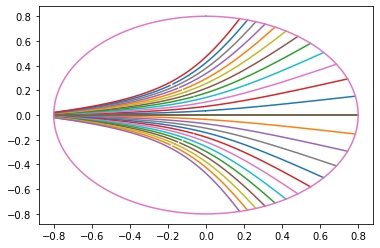

In [18]:
from scipy.integrate import odeint

number=[0,1,2,3,4,5,6,7,8,9,10,11]

for k in range(len(number)) :
    def model(r,θ):
        drdθ =(r**2)*((1-(Nm*(1-(r/R)**γ)/Nc)-((R**2)/(r**2))*(math.sin(Φk[number[k]]))**2)**0.5)/(R*sin(Φk[number[k]]))
        return drdθ
    r0 = R  
    θ = np.linspace(θk[number[k]],θ2k[number[k]],1000)
    θ0=[]
    for n in range(len(θ)) :
            if θ[n]>=θk[number[k]]-(np.abs(Θk[number[k]]))+0.1*pi/180:
                θ0.append(θ[n])
                r= odeint(model,r0,θ0)
           # else:
                #r=0
    r = [i[0] for i in r]
    combined1=np.vstack((θ0,r[::])).T
          
    def model(r,θ):
        drdθ =(r**2)*((1-(Nm*(1-(r/R)**γ)/Nc)-((R**2)/(r**2))*(math.sin(Φk[number[k]]))**2)**0.5)/(R*sin(Φk[number[k]]))
        return drdθ
    r0 = R  
    θ = np.linspace(θk[number[k]],θ2k[number[k]],1000)
    θ0=[]
    for n in range(len(θ)) :
            if θ[n]<=θ2k[number[k]]+(np.abs(Θk[number[k]]))-0.1*pi/180:
                θ0.append(θ[n])
                r= odeint(model,r0,θ0)
            #else:
                #r=0
    r = [i[0] for i in r]
    combined2=np.vstack((θ0,r[::-1])).T

    r=np.concatenate((combined1, combined2 ))
#θ=np.concatenate((θ01, θ02))

    #plt.plot(r[:,0],r[:,1])
    α = np.linspace(0,pi*2,1000)
    x=r[:,1]*cos(r[:,0])
    y=r[:,1]*sin(r[:,0])
    
    #polar coordinate metod1
    # Calculating radius
    #RR = (x**2 + y**2)**0.5
    # Calculating angle (theta) in radian
    #theta = arctan(y/x)
    # Converting theta from radian to degree
    #theta = 180 * theta/math.pi
    
    #polar coordinate metod2
    #RR = r[:,1]
    #theta = r[:,0]
    #fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    #ax.plot(theta, RR)
    #np.savetxt("r polar"+str(number[k])+".txt",r)
    
    x2=R*sin(α)
    y2=R*cos(α)
    x3=R1*sin(α)
    y3=R1*cos(α)
    for n in range(1000) :
        if R1!=0:
            xCENTER = np.linspace(-R,-R1,1000)
            yCENTER=α*0
        else:
            xCENTER = np.linspace(-R,R,1000)
            yCENTER=α*0
    plt.plot(x,y)
    plt.plot(x,-y)
    plt.plot(xCENTER,yCENTER)

    combined3=np.vstack((x,y)).T
    combined4=np.vstack((x,-y)).T
    circles=np.vstack((x2,y2,x3,y3,xCENTER,yCENTER)).T
    np.savetxt("r"+str(number[k])+".txt",combined3)
    np.savetxt("-r"+str(number[k])+".txt",combined4)
np.savetxt("circles.txt",circles)
plt.plot(R*sin(α),R*cos(α))
plt.plot(R1*sin(α),R1*cos(α))

    
    
    
    
    
    

    #new = pd.concat([bbb, bbb], axis=1)

    #aaa= pd.read_csv("r"+str(number[k+1]), delimiter=" ")
    #aaa.columns = ["x"+str(number[k+1]), "y"+str(number[k+1])]
    #new = pd.concat([bbb, aaa], axis=1) 
    #print(bbb.columns = ["x"+str(number[k]), "y"+str(number[k])])
    #fig = px.line(new, new["x10"],new["y10"])
    #fig.show()

#np.savetxt("circles",circles)
#plt.plot(R*sin(α),R*cos(α))
#plt.plot(R1*sin(α),R1*cos(α))
    

#fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
#ax.plot(r[:,0], r[:,1])
#plt.show()
k=[0,1,2,3,4,5,6,7,8,9,10,11]       



In [19]:
R1

0

In [20]:
#ВЫВОД РЕЗУЛЬТАТОВ В 1 файл
bbb0 = pd.read_csv("r0.txt", delimiter=" ")
bbb1 = pd.read_csv("r1.txt", delimiter=" ")
bbb2 = pd.read_csv("r2.txt", delimiter=" ")
bbb3 = pd.read_csv("r3.txt", delimiter=" ")
bbb4 = pd.read_csv("r4.txt", delimiter=" ")
bbb5 = pd.read_csv("r5.txt", delimiter=" ")
bbb6 = pd.read_csv("r6.txt", delimiter=" ")
bbb7 = pd.read_csv("r7.txt", delimiter=" ")
bbb8 = pd.read_csv("r8.txt", delimiter=" ")
bbb9 = pd.read_csv("r9.txt", delimiter=" ")
bbb10 = pd.read_csv("r10.txt", delimiter=" ")
bbb11 = pd.read_csv("r11.txt", delimiter=" ")
#bbb12 = pd.read_csv("r12.txt", delimiter=" ")
bbb13 = pd.read_csv("-r0.txt", delimiter=" ")
bbb14 = pd.read_csv("-r1.txt", delimiter=" ")
bbb15 = pd.read_csv("-r2.txt", delimiter=" ")
bbb16 = pd.read_csv("-r3.txt", delimiter=" ")
bbb17 = pd.read_csv("-r4.txt", delimiter=" ")
bbb18 = pd.read_csv("-r5.txt", delimiter=" ")
bbb19 = pd.read_csv("-r6.txt", delimiter=" ")
bbb20 = pd.read_csv("-r7.txt", delimiter=" ")
bbb21 = pd.read_csv("-r8.txt", delimiter=" ")
bbb22 = pd.read_csv("-r9.txt", delimiter=" ")
bbb23 = pd.read_csv("-r10.txt", delimiter=" ")
bbb24 = pd.read_csv("-r11.txt", delimiter=" ")

circles = pd.read_csv("circles.txt", delimiter=" ")

bbb = pd.concat([circles, bbb0, bbb1, bbb2, bbb3, bbb4, bbb5, bbb6, bbb7, bbb8, bbb9, bbb10, bbb11, bbb13, bbb14, bbb15, bbb16, bbb17, bbb18, bbb19, bbb20, bbb21, bbb22, bbb23, bbb24], axis=1) 
#bbb.columns = ["Rx","Ry","R1x","R1y","x0", "y0","x1", "y1","x2", "y2","x3", "y3","x4", "y4","x5", "y5","x6", "y6","x7", "y7", "x8","y8", "x9","y9", "x10","y10", "x11","y11"]
bbb.to_excel('raw_data1.xls', index=False)


C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.


from scipy.integrate import odeint

number=[0,1,2,3,4,5,6,7,8,9,10,11]

for k in range(len(number)) :
    def model(r,θ):
        drdθ =(r**2)*((1-(Nm*(1-(r/R)**γ)/Nc)-((R**2)/(r**2))*(math.sin(Φk[number[k]]))**2)**0.5)/(R*sin(Φk[number[k]]))
        return drdθ
    r0 = R  
    θ = np.linspace(θk[number[k]],θ2k[number[k]],1000)
    θ0=[]
    for n in range(len(θ)) :
            if θ[n]>=θk[number[k]]-(np.abs(Θk[number[k]]))+0.1*pi/180:
                θ0.append(θ[n])
                r= odeint(model,r0,θ0)
           # else:
                #r=0
    r = [i[0] for i in r]
    combined1=np.vstack((θ0,r[::])).T
          
    def model(r,θ):
        drdθ =(r**2)*((1-(Nm*(1-(r/R)**γ)/Nc)-((R**2)/(r**2))*(math.sin(Φk[number[k]]))**2)**0.5)/(R*sin(Φk[number[k]]))
        return drdθ
    r0 = R  
    θ = np.linspace(θk[number[k]],θ2k[number[k]],1000)
    θ0=[]
    for n in range(len(θ)) :
            if θ[n]<=θ2k[number[k]]+(np.abs(Θk[number[k]]))-0.1*pi/180:
                θ0.append(θ[n])
                r= odeint(model,r0,θ0)
            #else:
                #r=0
    r = [i[0] for i in r]
    combined2=np.vstack((θ0,r[::-1])).T

    r=np.concatenate((combined1, combined2 ))
#θ=np.concatenate((θ01, θ02))

    #plt.plot(r[:,0],r[:,1])
    α = np.linspace(0,pi*2,1000)
    x=r[:,1]*cos(r[:,0])
    y=r[:,1]*sin(r[:,0])
    
    #polar coordinate metod1
    # Calculating radius
    #RR = (x**2 + y**2)**0.5
    # Calculating angle (theta) in radian
    #theta = arctan(y/x)
    # Converting theta from radian to degree
    #theta = 180 * theta/math.pi
    
    #polar coordinate metod2
    RR = r[:,1]
    theta = r[:,0]
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(theta, RR)
    np.savetxt("r polar"+str(number[k])+".txt",r)
    
    x2=R*sin(α)
    y2=R*cos(α)
    x3=R1*sin(α)
    y3=R1*cos(α)
    #plt.plot(x,y)
    combined3=np.vstack((x,y)).T
    circles=np.vstack((x2,y2,x3,y3)).T
    np.savetxt("r"+str(number[k])+".txt",combined3)
np.savetxt("circles.txt",circles)
#plt.plot(R*sin(α),R*cos(α))
#plt.plot(R1*sin(α),R1*cos(α))

    
    
    
    
    
    

    #new = pd.concat([bbb, bbb], axis=1)

    #aaa= pd.read_csv("r"+str(number[k+1]), delimiter=" ")
    #aaa.columns = ["x"+str(number[k+1]), "y"+str(number[k+1])]
    #new = pd.concat([bbb, aaa], axis=1) 
    #print(bbb.columns = ["x"+str(number[k]), "y"+str(number[k])])
    #fig = px.line(new, new["x10"],new["y10"])
    #fig.show()

#np.savetxt("circles",circles)
#plt.plot(R*sin(α),R*cos(α))
#plt.plot(R1*sin(α),R1*cos(α))
    

#fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
#ax.plot(r[:,0], r[:,1])
#plt.show()
k=[0,1,2,3,4,5,6,7,8,9,10,11]       